<a href="https://colab.research.google.com/github/charlie-aashutosh/OpenCV---Charile/blob/master/Basic_operations_using_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import cv2
import imutils

In [6]:
from google.colab.patches import cv2_imshow

In [7]:
img=cv2.imread("/content/Screenshot 2020-09-25 163726.png")

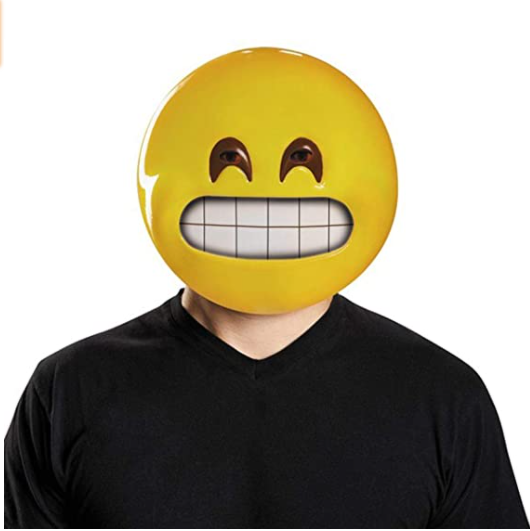

None


In [8]:
print(cv2_imshow(img))

In [9]:
#resizing an image
resizeimg=imutils.resize(img, width=20)

In [10]:
cv2.imwrite("resizedimg.jpg", resizeimg)

True

In [11]:
print(cv2_imshow(resizeimg))

None


In [12]:
#blur an image
img=cv2.imread("/content/Screenshot 2020-09-25 163726.png")
gaussianImg=cv2.GaussianBlur(img,(21,21),0)
cv2.imwrite("gaussianimg.jpg", gaussianImg)

True

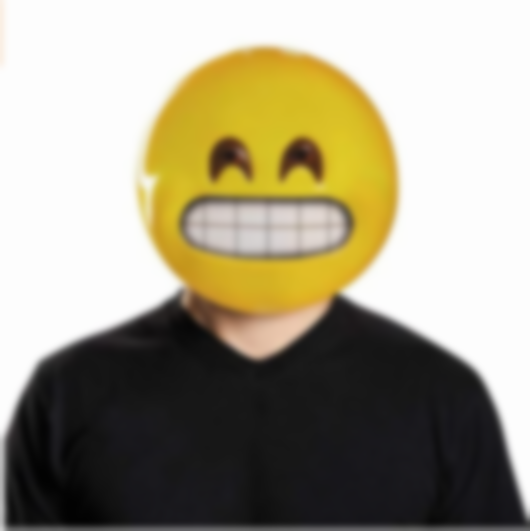

None


In [13]:
print(cv2_imshow(gaussianImg))

In [15]:
#BGR to Grey and then applying different thresholding
grayimg=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [16]:
grayimg

array([[232, 241, 248, ..., 255, 255, 255],
       [228, 238, 246, ..., 255, 255, 255],
       [223, 235, 245, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ...,  22,  21,   7],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

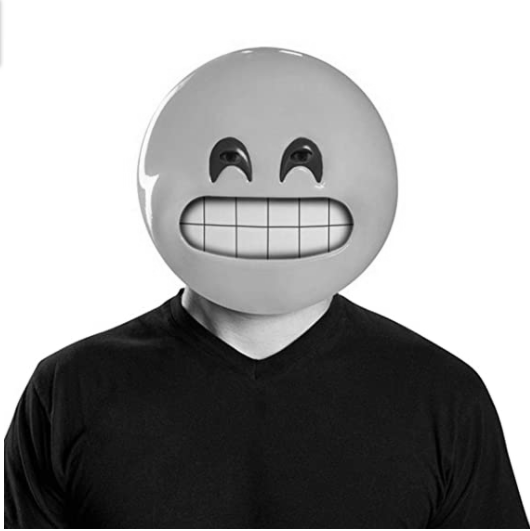

None


In [17]:
print(cv2_imshow(grayimg))

In [24]:
thresholdImg=cv2.threshold(grayimg, 150, 255, cv2.THRESH_BINARY)[1]

In [32]:
cv2.imwrite("thresholdimg.jpg", thresholdImg)

True

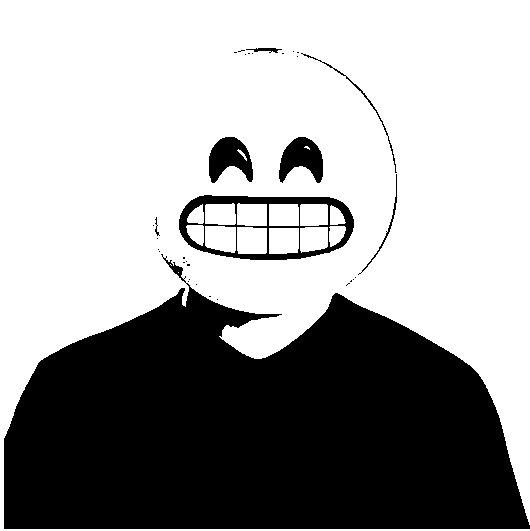

None


In [33]:
print(cv2_imshow(thresholdImg))

In [55]:
#camera access

In [51]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [53]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

'NoneType' object has no attribute 'split'
